- Nama: Moh. Alex Maghfur
- Email: mmaghfur.muhammad01@gmail.com
- Id Dicoding: mamaghfur

#Pendahuluan

Permasalahan yang akan dibahas di sini adalah:
1. Bagaimana perbandingan jumlah pengendara berdasarkan tipe dan berdasarkan hari dalam satu minggu?
2. Bagaimana hubungan antara suhu dengan jumlah pengendara?

#Persiapan

Menyiapkan semua library yang akan dibutuhkan

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data yang sudah diunggah ke Google Drive pribadi

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Wrangling

##Gathering Data

Data yang diperoleh terbagi menjadi data per jam dan data per hari

In [26]:
hour = pd.read_csv('/content/drive/MyDrive/Dicoding - Belajar Analisis Data dengan Python/hour.csv')
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
day = pd.read_csv('/content/drive/MyDrive/Dicoding - Belajar Analisis Data dengan Python/day.csv')
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##Assessing Data

In [28]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [29]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cek apakah terdapat missing values

In [30]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [31]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek apakah terdapat data duplikat

In [32]:
hour.duplicated().sum()

0

In [33]:
day.duplicated().sum()

0

##Data Cleaning

Pada tahap ini kolom yang memiliki label yang tidak sesuai akan dibenahi. Sebagai contoh kolom bulan dan season yang masih berupa angka akan dikembalikan ke nama bulan dan season sebenarnya

In [34]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour['mnth'] = hour['dteday'].dt.month_name()
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour['season']:
    season = find_season(season)
    season_list.append(season)

hour['season'] = season_list
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, perbaiki kolom weekday dan year

In [36]:
hour['weekday'] = hour['dteday'].dt.day_name()
hour['yr'] = hour['dteday'].dt.year
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Lakukan proses yang sama terhadap data per hari

In [37]:
day['dteday'] = pd.to_datetime(day['dteday'])
day['mnth'] = day['dteday'].dt.month_name()
day['weekday'] = day['dteday'].dt.day_name()
day['yr'] = day['dteday'].dt.year

In [38]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in day['season']:
    season = find_season(season)
    season_list.append(season)

day['season'] = season_list
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#Analisis Data Eksploratif

##Membandingkan total pengendara casual vs registered

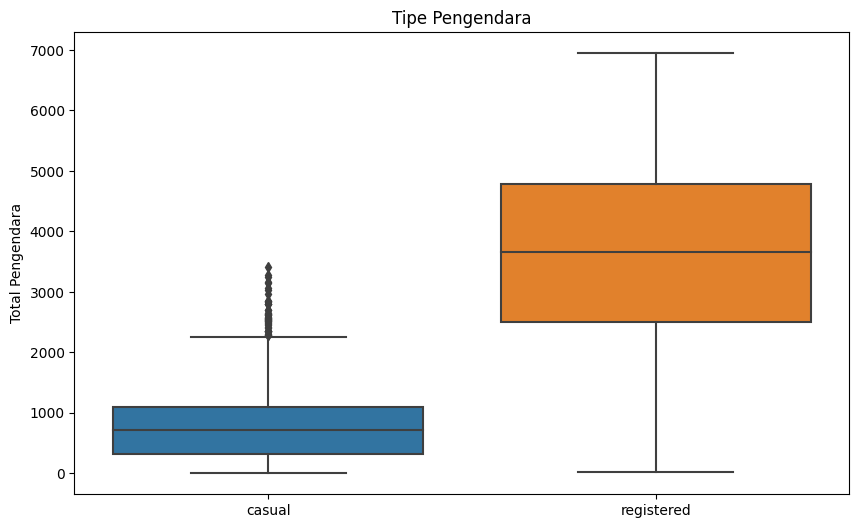

In [39]:
plt.figure(figsize=(10,6))

sns.boxplot(data=day[['casual', 'registered']])

# Add labels and a title to the plot
plt.ylabel("Total Pengendara")
plt.title("Tipe Pengendara")

# Show the plot
plt.show()

Dari diagram di atas, tampak bahwa pengendara registered cenderung lebih banyak jika dibandingkan dengan pengendara casual

##Membandingkan total pengendara harian dalam satu minggu

In [40]:
weekday_users = hour.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users = weekday_users.reset_index()

weekday_users

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [41]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

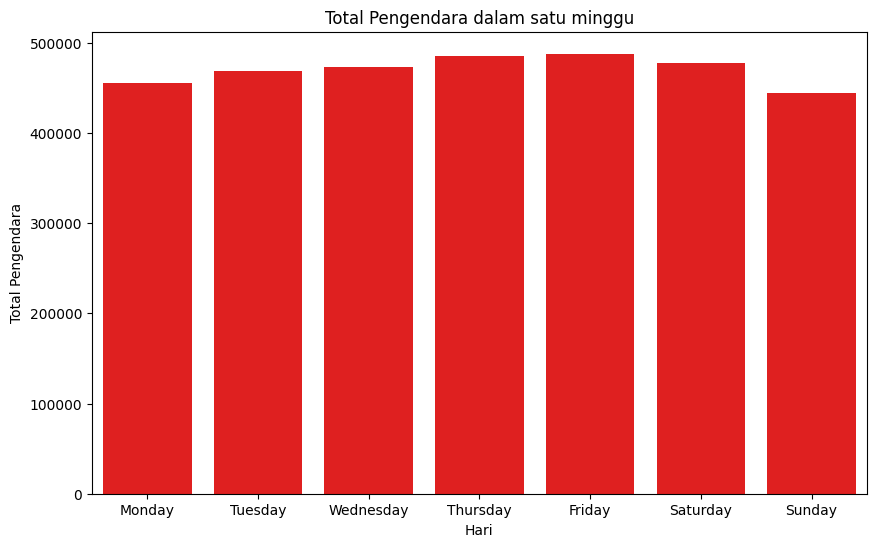

In [42]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users, order=day_order, color='red')

plt.xlabel("Hari")
plt.ylabel("Total Pengendara")
plt.title("Total Pengendara dalam satu minggu")

plt.show()

Dari diagram di atas, tampak bahwa total pengendara dalam satu minggu cenderung stagnan, tidak ada peningkatan maupun penurunan yang signifikan

##Analisis korelasi antar variabel

<Axes: >

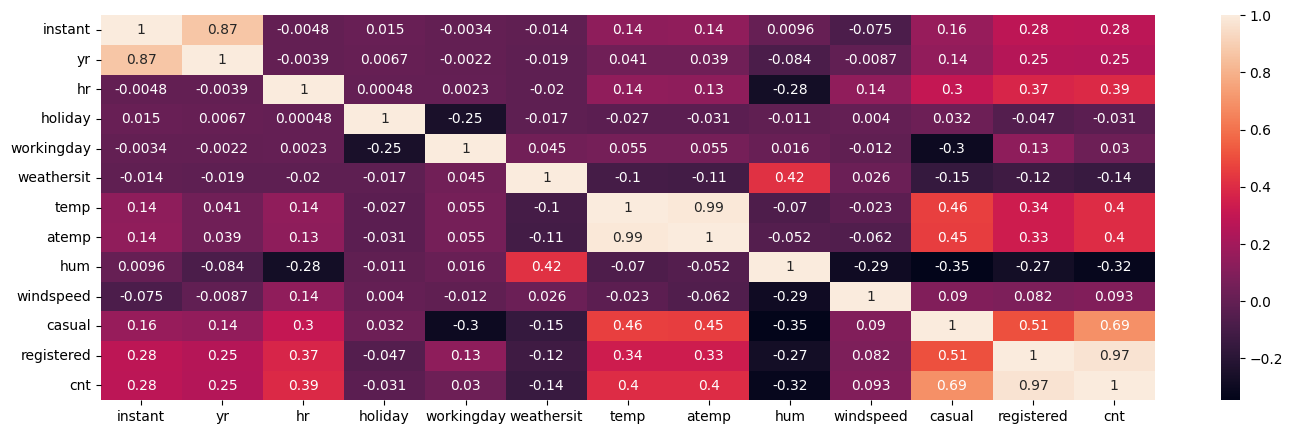

In [43]:
plt.figure(figsize=(17, 5))
sns.heatmap(hour.corr(numeric_only=True), annot=True)

Terdapat korelasi sedang antara variable hr, temp dan atemp terhadap jumlah pengendara (sekitar 0.4)

#Streamlit

#Penutup

Dari penjelasan di atas dapat disimpulkan bahwa:
1. Pengendara registered cenderung lebih banyak jika dibandingkan dengan pengendara casual, sedangkan total pengendara dalam satu minggu cenderung stagnan, tidak ada peningkatan maupun penurunan yang signifikan.
2. Terdapat korelasi sedang antara variable hr, temp dan atemp terhadap jumlah pengendara